<a href="https://colab.research.google.com/github/rafaart/projeto10Restic36/blob/develop/K_MEANS_UNID_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas 📚

In [ ]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import calinski_harabasz_score


# Carregando o Data frame 📤


Verificando o número de colunas ao carregar os dados.

Renomeando as colunas de acordo com o número correto de colunas.

Passo 1: Verificar o número de colunas
Primeiro, carregando o DataFrame e verifique quantas colunas ele tem:

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Definir o caminho da pasta K-means no Google Drive
data_path = '/content/drive/MyDrive/teste/'
# Carregar os arquivos de dados
df_x_train = pd.read_csv(data_path + 'X_train.txt', delim_whitespace=True, header=None)
#X_test = pd.read_csv(data_path + 'X_test.txt', delim_whitespace=True, header=None)
#y_train = pd.read_csv(data_path + 'y_train.txt', header=None, names=['Activity'])
y_test = pd.read_csv(data_path + 'y_test.txt', header=None, names=['Activity'])
print(df_x_train.shape)
print(y_test.shape)

<ipython-input-4-af8ff3ef8824>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_x_train = pd.read_csv(data_path + 'X_train.txt', delim_whitespace=True, header=None)


(7352, 561)
(2947, 1)


In [ ]:
# Verificar a quantidade de colunas
print(f"Quantidade de colunas: {df_x_train.shape[1]}")

# Exibir as primeiras linhas do DataFrame
print(y_test.head(10))

Quantidade de colunas: 561
   Activity
0         5
1         5
2         5
3         5
4         5
5         5
6         5
7         5
8         5
9         5


In [ ]:
df_x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Passo 2: Renomear as colunas corretamente

Depois de verificar quantas colunas o DataFrame tem, iremos renomeá-las de acordo com o proposito. O arquivo tem 561 colunas, com uma lista com 561 nomes.

In [ ]:
# Se você quer renomear apenas as 3 primeiras colunas (por exemplo, 'Feature1', 'Feature2', 'Feature3')
df_x_train.columns = ['Coluna1',] + ['Coluna' + str(i) for i in range(2, df_x_train.shape[1] + 1)]

# Verificar se as colunas foram renomeadas corretamente
print(df_x_train.head())


    Coluna1   Coluna2   Coluna3   Coluna4   Coluna5   Coluna6   Coluna7  \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

    Coluna8   Coluna9  Coluna10  ...  Coluna552  Coluna553  Coluna554  \
0 -0.983185 -0.923527 -0.934724  ...  -0.074323  -0.298676  -0.710304   
1 -0.974914 -0.957686 -0.943068  ...   0.158075  -0.595051  -0.861499   
2 -0.963668 -0.977469 -0.938692  ...   0.414503  -0.390748  -0.760104   
3 -0.982750 -0.989302 -0.938692  ...   0.404573  -0.117290  -0.482845   
4 -0.979672 -0.990441 -0.942469  ...   0.087753  -0.351471  -0.699205   

   Coluna555  Coluna556  Coluna557  Coluna558  Coluna559  Coluna560  Coluna561  
0  -0.112754   0.030400  -0.4

In [ ]:
# Verificando as quantidades de linhas e colunas  do "df_x_train"
df_x_train.shape

(7352, 561)

In [ ]:
# Verificando as quantidades de linhas e colunas  do "y_test"
y_test.shape

(2947, 1)

Verificando os valores nulos no data frame

In [ ]:
#identificar o valores nulos no date frame
df_x_train.isnull().sum()

,0
Coluna1,0
Coluna2,0
Coluna3,0
Coluna4,0
Coluna5,0
...,...
Coluna557,0
Coluna558,0
Coluna559,0
Coluna560,0


# Visualisando os oultiers com bloxplot ⛵



O boxplot é uma ferramenta gráfica amplamente utilizada para a identificação de outliers e a análise da distribuição de dados. Ele oferece uma visualização clara, concisa e intuitiva da dispersão, centralidade e presença de valores extremos em um conjunto de dados, sendo necessária na etapa de análise exploratória.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# # Seleciona colunas numéricas com mais de 2 valores únicos
# #colunas_numericas = df_x_train.select_dtypes(include=[np.number]).columns
# #colunas_numericas = [col for col in colunas_numericas if df_x_train[col].nunique() > 2]

# # Lista para armazenar as porcentagens de outliers
# percentuais_outliers = []

# # Define o número de colunas por figura
# cols_per_fig = 3

# if colunas_numericas:
#     for i in range(0, len(colunas_numericas), cols_per_fig):
#         cols_group = colunas_numericas[i:i + cols_per_fig]

#         # Cria a figura para o grupo atual de colunas
#         plt.figure(figsize=(8, len(cols_group) * 5))

#         for j, col in enumerate(cols_group, 1):
#             plt.subplot(len(cols_group), 1, j)

#             # Calcula os outliers usando a regra do IQR
#             q1 = df_x_train[col].quantile(0.25)
#             q3 = df_x_train[col].quantile(0.75)
#             iqr = q3 - q1
#             lim_inf = q1 - 1.5 * iqr
#             lim_sup = q3 + 1.5 * iqr
#             outliers = df_x_train[(df_x_train[col] < lim_inf) | (df_x_train[col] > lim_sup)]
#             perc_outliers = len(outliers) / len(df_x_train[col]) * 100
#             percentuais_outliers.append(perc_outliers)

#             # Plotagem do boxplot
#             sns.boxplot(x=df_x_train[col])
#             plt.title(f'Boxplot de {col} - {perc_outliers:.2f}% Outliers')
#             plt.xlabel(f'{col}')

#         plt.tight_layout(h_pad=2)
#         plt.show()

#     # Exibe o histograma da distribuição de percentuais de outliers
#     plt.figure(figsize=(10, 6))
#     sns.histplot(percentuais_outliers, bins=10, kde=True)
#     plt.title("Distribuição dos Percentuais de Outliers")
#     plt.xlabel("Percentual de Outliers (%)")
#     plt.ylabel("Frequência")
#     plt.show()

# else:
#     print("Nenhuma coluna numérica encontrada para visualização.")



Após a aplicação do boxplot , foi possível identificar a presença de outliers destacados como pontos isolados nos gráficos. Essa análise visual reforça a necessidade de um tratamento adequado para os outliers, de modo a minimizar seu impacto na qualidade dos dados e no desempenho dos modelos, garantindo maior confiabilidade nas análises subsequentes.

# Correção de Outliers 🤏

Winsorização (Limitar os Outliers):

Em vez de remover os outliers, você pode limitar seus valores ao percentil mais extremo aceitável (ex: 5º e 95º percentil), mantendo os dados, mas reduzindo o impacto dos outliers extremos.



In [ ]:
#Aplicando a técnica da Winsorização
from scipy.stats import zscore

z_scores = zscore(df_x_train)
X_train_sem_out = df_x_train.copy() #criando um data frame


# Definir os percentis para Winsorização
lower_percentile = df_x_train.quantile(0.05) # os ultimos 5%
upper_percentile = df_x_train.quantile(0.95)  # os ultimos 95%

# Aplicar Winsorização a cada coluna
df_x_train = np.where(z_scores > upper_percentile , upper_percentile , df_x_train) # depois modificar o X_train_sem_out
df_x_train = np.where(z_scores < lower_percentile, lower_percentile, df_x_train)

# Exibir resultados
print("DataFrame original:")
print(df_x_train)
print("\nDataFrame após Winsorização:")
print(X_train_sem_out)

DataFrame original:
[[ 0.28858451 -0.05528138 -0.17327756 ... -0.84124676  0.33239179
  -0.05862692]
 [ 0.17814798  0.0177493  -0.17327756 ... -0.8447876   0.33239179
  -0.05431672]
 [ 0.17814798 -0.01946716 -0.11346169 ... -0.84893347  0.33239179
  -0.04911782]
 ...
 [ 0.17814798 -0.01701062 -0.0475159  ... -0.77913261  0.33239179
   0.29155578]
 [ 0.28965416 -0.01884304 -0.17327756 ... -0.78518142  0.33239179
   0.29155578]
 [ 0.37470809  0.0177493  -0.17327756 ... -0.78326693  0.33239179
   0.29155578]]

DataFrame após Winsorização:
       Coluna1   Coluna2   Coluna3   Coluna4   Coluna5   Coluna6   Coluna7  \
0     0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1     0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2     0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3     0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4     0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.

# Feature Engineering 🛠️

Vamos normalizar os dados...

Antes de aplicar o k-means, você precisa garantir que os dados estejam prontos. Isso inclui:

Normalização ou padronização dos dados: O k-means usa distâncias euclidianas, então é importante que todas as variáveis tenham a mesma escala. Para isso, você pode usar a normalização ou padronização.

O RobustScaler remove a mediana e escala os dados de acordo com o intervalo interquartil, tornando-o útil quando os dados contêm muitos outliers, garantindo mais representatividade dos dados.

Preservação da forma da distribuição: O RobustScaler tende a manter a forma original da distribuição dos dados de maneira mais fiel, mesmo na presença de valores extremos. Isso é importante para muitos algoritmos de aprendizado de máquina que assumem distribuições específicas.


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(df_x_train)



## Aplicação do PCA

Para verificar como os dados estão distribuídos entre os clusters, você pode visualizar os resultados, especialmente se estiver lidando com uma redução de dimensionalidade (como o PCA).

Para reduzir a dimensionalidade do conjunto de dados, que possui muitas dimensões e pode dificultar a identificação de clusters significativos, aplicaremos o PCA (Análise de Componentes Principais). Essa técnica reduz a dimensionalidade, preservando a maior parte da variabilidade dos dados e melhorando a eficiência computacional do K-Means. Em seguida, utilizaremos o PCA para projetar os dados em 2D, permitindo a visualização dos clusters da seguinte forma:

In [ ]:
from sklearn.decomposition import PCA

# Aplicando PCA para reduzir para 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # X_scaled é o seu conjunto de dados já normalizado

# Escolher o número de clusters (K)📈

Uma etapa crucial no K-Means é determinar o número ideal de clusters. Para isso, utilizaremos o Método do Cotovelo (Elbow Method), uma técnica amplamente empregada para identificar o valor mais adequado de K. Então vamos aplicar da seguinte forma:

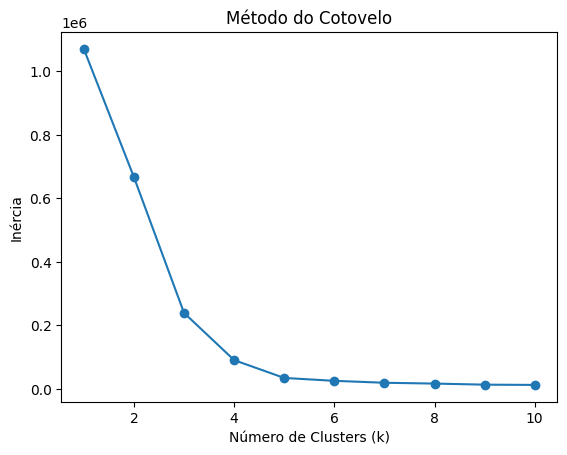

In [ ]:
# Método do Cotovelo
inertia = []
for k in range(1, 11):  # Testando k de 1 até 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.show()


# Testando os valores de Silhouette Score para diferentes valores de K
O objetivo de testar os valores do Silhouette Score para diferentes valores de K é avaliar a qualidade dos clusters gerados pelo algoritmo K-Means e determinar o número ideal de clusters (K).

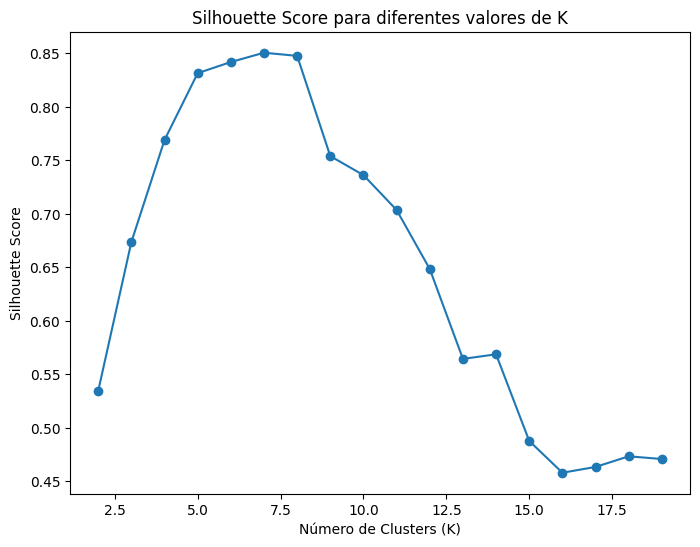


Número ideal de clusters com base no Silhouette Score: K=7


In [ ]:
# Defina o intervalo de valores de K para testar
K_range = range(2, 20)

silhouette_scores = []  # Lista para armazenar os scores

# Loop sobre os diferentes valores de K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=30)
    kmeans.fit(X_pca)  # Ajusta o modelo com seus dados (X_pca_df)

    # Calculando o Silhouette Score
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)

# Verifique se a lista silhouette_score
# Plotar o Silhouette Score em função de K
plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, '-o')
plt.title("Silhouette Score para diferentes valores de K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

# Determinar o valor de K com maior Silhouette Score
best_k = K_range[np.argmax(silhouette_scores)]
print(f"\nNúmero ideal de clusters com base no Silhouette Score: K={best_k}")

# Treinar o modelo K-Means
Depois de determinar o número ideal de clusters (k), vamos aplicar o k-means:

In [ ]:
# Supondo que você tenha escolhido k=7 após o método do cotovelo
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_pca)

# Obter os rótulos dos clusters (que dizem a qual cluster cada ponto pertence)
labels = kmeans.labels_

# Obter os centróides dos clusters
centroids = kmeans.cluster_centers_


Agora labels contém as informações sobre a qual cluster cada ponto pertence, e centroids contém as coordenadas dos centróides dos clusters no espaço reduzido.

# Visualizar os clusters no gráfico

Agora que temos os dados em duas dimensões (no espaço 2D), podemos criar um gráfico para visualizar como os clusters estão distribuídos.

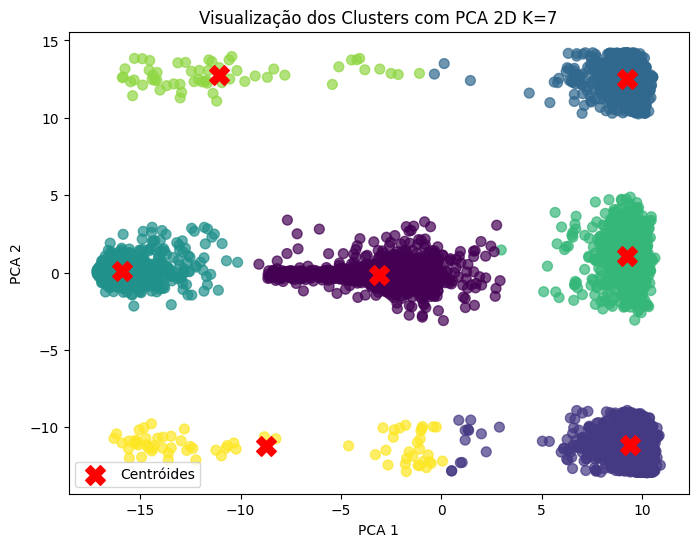

In [ ]:
import matplotlib.pyplot as plt

# Plotando os clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)

# Plotando os centróides
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centróides')

# Adicionando título e legendas
plt.title('Visualização dos Clusters com PCA 2D K=7')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


Interpretação dos resultados

Agora, ao observar o gráfico, você poderá ver a distribuição dos pontos de dados, agrupados em clusters, e os centróides de cada cluster.

Cores diferentes indicam diferentes clusters.
Centróides (marcados com 'X') mostram o centro de cada grupo de pontos.
Essa visualização ajudará a interpretar como os dados estão agrupados e a verificar se o k-means fez um bom trabalho na divisão dos dados.

## Treinar o modelo K-Means

O Silhouette Score é uma das métricas mais comuns para avaliar a qualidade do clustering. Ele mede o quão bem cada ponto está posicionado dentro de seu próprio cluster em comparação com outros clusters. O valor varia de -1 a +1:

+1: Os pontos estão bem agrupados.

0: Os pontos estão na fronteira de dois clusters.

-1: Os pontos estão mal agrupados.

In [ ]:
from sklearn.metrics import silhouette_score

# Calcular o Silhouette Score do K=7
sil_score = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.8505842339695653


Inércia (Within-Cluster Sum of Squares)
A inércia é outra métrica importante. Ela mede a soma das distâncias quadradas entre os pontos e seus centróides dentro de cada cluster. A inércia é útil para verificar a qualidade do agrupamento em termos de coesão interna (quanto os pontos de um cluster estão próximos uns dos outros).

Quanto menor a inércia, melhor o agrupamento.
No entanto, a inércia diminui à medida que você aumenta o número de clusters. Por isso, é importante combinar com o Método do Cotovelo para escolher o número ideal de clusters.

In [ ]:
# Calcular a inércia K = 7
inertia = kmeans.inertia_
print(f"Inércia: {inertia}")


Inércia: 19081.31435583407


# Índice Rand
O Rand Index compara a similaridade entre dois agrupamentos. Ele é mais útil quando você tem rótulos verdadeiros (ground Truth), ou seja, se sabe qual é o cluster correto para cada ponto.

In [ ]:
from sklearn.metrics import adjusted_rand_score


# Supondo que você tenha rótulos verdadeiros (y_true)
rand_index = adjusted_rand_score(y_test, labels)
print(f"Rand Index: {rand_index}")


ValueError: labels_true must be 1D: shape is (2947, 1)

In [ ]:
from sklearn.metrics import adjusted_rand_score

print(f"Tamanho de y_test: {len(y_test)}")
print(f"Tamanho de labels: {len(labels)}")



Tamanho de y_test: 2947
Tamanho de labels: 7352


# Índice Calinski-Harabasz

Essa métrica calcula a razão entre a dispersão entre os clusters e a dispersão dentro dos clusters. Um valor maior indica um agrupamento melhor.

In [ ]:
from sklearn.metrics import calinski_harabasz_score

# Calcular o Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_pca, labels)
print(f"Calinski-Harabasz Index: {ch_score}")


Calinski-Harabasz Index: 67493.06756904899


# Análise dos Resultados

Análise dos Resultados do Modelo K-Means
Os resultados obtidos para o modelo K-Means indicam uma configuração de alto desempenho no agrupamento dos dados, considerando as análises avaliadas. A seguir, detalhamos cada uma dessas considerações e seus significados relevantes:

1. Número Ideal de Clusters (K = 7)

O número K=7 foi definido como ideal com base no Silhouette Score , refletindo a estrutura natural dos dados. Essa escolha demonstra que a divisão em sete agrupamentos fornece o melhor equilíbrio entre a coesão interna e a separação entre os clusters. Essa configuração é indicativa de uma estrutura subjacente clara nos dados, o que é fundamental para análises interpretativas e decisões estabelecidas nos agrupamentos.
2. Pontuação da silhueta: 0,8506
O Silhouette Score é uma métrica de avaliação que varia de -1 a 1 e mede a qualidade do agrupamento considerando:

Coesão interna : A proximidade dos pontos dentro de cada cluster.
Separação intercluster : A distância entre clusters diferentes.
Com um valor de
0,8506, o modelo apresentado:

Clusters altamente coesos : Os pontos estão bem agrupados em torno de seus centróides.
Boa separação : Existe uma clara distinção entre os clusters, diminuindo que há pouca ou nenhuma sobreposição entre eles.
Este resultado evidencia que os agrupamentos gerados possuem uma qualidade excepcional, reforçando a adequação do modelo para segmentação de dados.
3. Inércia: 19081,31

A inércia foi definida como a soma das distâncias quadradas entre os pontos e os centróides de seus respectivos clusters, é um indicativo de compacidade.

Um valor de 19081.31, apesar de ser relativo ao volume de dados, mostra que os clusters formados são compactos.
A redução da inércia com o aumento de K até 7 demonstram que a escolha deste valor como número ideal de clusters otimiza a relação entre simplicidade do modelo e precisão dos agrupamentos.
4. Índice Calinski-Harabasz: 67.493,07

O Índice Calinski-Harabasz , ou índice de razão de variância, mede a dispersão entre clusters em relação à dispersão interna. Um valor elevado como
67493,07 indica:

Dispersão intercluster significativa : Os clusters estão bem separados.
Baixa variabilidade intracluster : Os dados dentro de cada cluster são homogêneos.
Esse índice reforça a escolha de K = 7, evidenciando que o modelo é capaz de capturar as estruturas dos dados.




Passo a Passo:
Pré-processamento (Normalização ou Padronização): O t-SNE funciona melhor quando os dados estão escalados. Certifique-se de normalizar ou padronizar os dados para que todas as colunas tenham a mesma escala.

Aplicação do t-SNE: Use a classe TSNE do scikit-learn para reduzir os dados para 2 ou 3 dimensões.

Visualização dos resultados: Se reduzido para 2D, você pode visualizar em um gráfico de dispersão. Para 3D, use gráficos interativos.

# Conclusão

Os resultados obtidos confirmam a alta qualidade do modelo K-Means com K=7, evidenciada pelas notas de avaliação. O Silhouette Score , com valor de 0,8506, demonstra que os agrupamentos são altamente coesos e bem separados, estabelecendo uma clara distinção entre os clusters. A inércia , com valor de 19081,31, reflete a compactação dos dados dentro de cada agrupamento, reforçando a homogeneidade interna dos clusters. Por sua vez, o Índice Calinski-Harabasz , com valor de 67493,07, destaca a nitidez das fronteiras entre os clusters, demonstrando a eficácia do modelo na separação dos grupos. Esses resultados reforçam a robustez do modelo de segmentação de dados e sua adequação para aplicações que exigem uma análise precisa de padrões e comportamentos.

Essa configuração é ideal para aplicações em segmentações precisas, como análises de dados para o Reconhecimento de Atividade Humana (HAR) por meio de smartphones, que enfrentam desafios significativos. Os resultados obtidos fornecem uma base sólida para gerar insights estratégicos e orientar ações fundamentadas nos agrupamentos identificados.

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Passo 1: Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_x_train)

# Passo 2: Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=50)  # Para 2D
X_tsne = tsne.fit_transform(X_scaled)

# Passo 3: Visualização dos dados reduzidos
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], alpha=0.7)
plt.title("t-SNE Visualização dos Dados (2D)")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.show()


Explicação dos Hiperparâmetros do t-SNE:

n_components: Define o número de dimensões finais (2D ou 3D).

perplexity: Relaciona-se ao número de vizinhos considerados para cada ponto. Um bom valor padrão é entre 5 e 50.

random_state: Para reprodutibilidade dos resultados.

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

perplexities = [10, 30, 50, 100]

for perplexity in perplexities:
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X_scaled)  # X_scaled é o dataset normalizado
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], alpha=0.7)
    plt.title(f"t-SNE com Perplexity = {perplexity}")
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.show()
